In [1]:
library(dplyr)
library(stringr)
library(lubridate)
library(ggplot2)
library("reshape2")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Etc/UCT’ (or equivalent)”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
df <- read.csv("../Data/data_demos.csv")

In [3]:
df

X       starttime_daylight        conversation_id
1        0      2018-10-25 22:47:29+00:00 11343          
2        1      2018-10-25 22:47:29+00:00 11343          
3        2      2018-10-25 22:47:29+00:00 11343          
4        3      2018-10-25 22:47:29+00:00 11343          
5        4      2018-10-25 22:47:29+00:00 11343          
6        5      2018-10-25 22:47:29+00:00 11343          
7        6      2018-10-26 18:37:23+00:00 11456          
8        7      2018-10-26 18:37:23+00:00 11456          
9        8      2018-10-26 18:37:23+00:00 11456          
10       9      2018-10-26 18:37:23+00:00 11456          
11      10      2018-10-26 20:55:21+00:00 11493          
12      11      2018-10-26 20:55:21+00:00 11493          
13      12      2018-10-26 20:55:21+00:00 11493          
14      13      2018-10-26 20:55:21+00:00 11493          
15      14      2018-10-26 20:55:21+00:00 11493          
16      15      2018-10-26 20:55:21+00:00 11493          
17      16      2018-10-26 20:55:21+00:00 11493          
18      17      2018-10-26 20:55:21+00:00 11493          
19      18      2018-10-26 20:55:21+00:00 11493          
20      19      2018-10-26 20:55:21+00:00 11493          
21      20      2018-10-26 20:55:21+00:00 11493          
22      21      2018-10-26 20:55:21+00:00 11493          
23      22      2018-10-30 22:50:52+00:00 12323          
24      23      2018-11-03 13:20:45+00:00 12892          
25      24      2018-11-03 13:20:45+00:00 12892          
26      25      2018-11-03 13:20:45+00:00 12892          
27      26      2018-11-03 13:20:45+00:00 12892          
28      27      2018-11-03 17:57:12+00:00 12950          
29      28      2018-11-03 17:57:12+00:00 12950          
30      29      2018-11-03 17:57:12+00:00 12950          
⋮       ⋮       ⋮                         ⋮              
5514868 5514867 2022-06-06 02:18:16+00:00 1368614        
5514869 5514868 2022-06-06 02:18:16+00:00 1368614        
5514870 5514869 2022-06-06 02:18:16+00:00 1368614        
5514871 5514870 2022-06-06 02:18:16+00:00 1368614        
5514872 5514871 2022-06-06 02:18:16+00:00 1368614        
5514873 5514872 2022-06-06 02:18:16+00:00 1368614        
5514874 5514873 2022-06-06 06:14:25+00:00 1368769        
5514875 5514874 2022-06-06 06:14:25+00:00 1368769        
5514876 5514875 2022-06-06 06:14:25+00:00 1368769        
5514877 5514876 2022-06-06 06:14:25+00:00 1368769        
5514878 5514877 2022-06-06 08:58:48+00:00 1368877        
5514879 5514878 2022-06-06 08:58:48+00:00 1368877        
5514880 5514879 2022-06-06 08:58:48+00:00 1368877        
5514881 5514880 2022-06-06 08:58:48+00:00 1368877        
5514882 5514881 2022-06-06 10:46:58+00:00 1368957        
5514883 5514882 2022-06-06 11:08:47+00:00 1368978        
5514884 5514883 2022-06-06 11:08:47+00:00 1368978        
5514885 5514884 2022-06-06 11:08:47+00:00 1368978        
5514886 5514885 2022-06-06 11:08:47+00:00 1368978        
5514887 5514886 2022-06-06 12:31:37+00:00 1369063        
5514888 5514887 2022-06-06 12:31:37+00:00 1369063        
5514889 5514888 2022-06-06 12:31:37+00:00 1369063        
5514890 5514889 2022-06-06 12:31:37+00:00 1369063        
5514891 5514890 2022-06-06 16:21:59+00:00 1369332        
5514892 5514891 2022-06-06 16:21:59+00:00 1369332        
5514893 5514892 2022-06-06 16:21:59+00:00 1369332        
5514894 5514893 2022-06-06 16:21:59+00:00 1369332        
5514895 5514894 2022-06-06 18:51:39+00:00 1369591        
5514896 5514895 2022-06-06 18:51:39+00:00 1369591        
5514897 5514896 2022-06-06 20:26:44+00:00 1369828        
        issues                                    referred_by          
1       Anxiety/Stress|Bully|Relationship|Suicide                      
2                                                                      
3                                                                      
4       Anxiety/Stress|Bully|Relationship|Suicide                      
5                                                   

In [4]:
df <- df %>% arrange(conversation_id, desc(issues))
df <- df[!duplicated(df[,c("conversation_id")]),]
df

X       starttime_daylight        conversation_id
1       298323  2018-10-25 15:46:42+00:00 11247          
7         9375  2018-10-25 15:54:58+00:00 11248          
11       25172  2018-10-25 15:58:10+00:00 11249          
15      104369  2018-10-25 16:12:30+00:00 11250          
19       65827  2018-10-25 16:39:02+00:00 11251          
25      207283  2018-10-25 16:43:17+00:00 11252          
31       32652  2018-10-25 17:21:59+00:00 11253          
35       92029  2018-10-25 17:27:38+00:00 11254          
39       99056  2018-10-25 17:29:50+00:00 11255          
45       11073  2018-10-25 17:36:37+00:00 11256          
51      181393  2018-10-25 17:36:58+00:00 11257          
57       32459  2018-10-25 17:40:09+00:00 11258          
63        3162  2018-10-25 17:40:39+00:00 11259          
67      343336  2018-10-25 17:51:33+00:00 11260          
75        3309  2018-10-25 18:00:38+00:00 11261          
81       76933  2018-10-25 18:16:02+00:00 11262          
85      280521  2018-10-25 18:22:19+00:00 11263          
91       70215  2018-10-25 18:27:03+00:00 11264          
95      207480  2018-10-25 18:27:30+00:00 11265          
99        8091  2018-10-25 18:40:45+00:00 11266          
103      33347  2018-10-25 18:43:11+00:00 11267          
107     109926  2018-10-25 18:55:12+00:00 11268          
111      13508  2018-10-25 18:57:15+00:00 11269          
112      55405  2018-10-25 19:00:24+00:00 11270          
118     266903  2018-10-25 19:03:54+00:00 11271          
119      11364  2018-10-25 19:08:20+00:00 11272          
125     173679  2018-10-25 19:11:26+00:00 11273          
129      85326  2018-10-25 19:14:32+00:00 11274          
135       2078  2018-10-25 19:37:55+00:00 11275          
143     210989  2018-10-25 19:39:04+00:00 11276          
⋮       ⋮       ⋮                         ⋮              
5514865 5484089 2022-06-06 21:37:35+00:00 1370058        
5514866 5363497 2022-06-06 21:37:41+00:00 1370059        
5514867 3578755 2022-06-06 21:38:30+00:00 1370060        
5514868 4926725 2022-06-06 21:38:42+00:00 1370061        
5514869 4224483 2022-06-06 21:38:53+00:00 1370062        
5514870 5310004 2022-06-06 21:38:57+00:00 1370063        
5514871 5213429 2022-06-06 21:39:24+00:00 1370064        
5514873 3925148 2022-06-06 21:39:26+00:00 1370065        
5514874 4223346 2022-06-06 21:39:26+00:00 1370066        
5514875 4140556 2022-06-06 21:40:00+00:00 1370067        
5514877 3896762 2022-06-06 21:40:07+00:00 1370068        
5514878 3675746 2022-06-06 21:40:08+00:00 1370069        
5514880 3269710 2022-06-06 21:40:11+00:00 1370070        
5514881 3385215 2022-06-06 21:40:12+00:00 1370071        
5514882 3592396 2022-06-06 21:40:25+00:00 1370072        
5514883 4193824 2022-06-06 21:40:39+00:00 1370073        
5514884 3147449 2022-06-06 21:40:55+00:00 1370074        
5514885 5446921 2022-06-06 21:40:59+00:00 1370075        
5514886 3386135 2022-06-06 21:41:07+00:00 1370076        
5514887 5208193 2022-06-06 21:41:16+00:00 1370077        
5514888 5306905 2022-06-06 21:41:26+00:00 1370078        
5514889 5100974 2022-06-06 21:41:27+00:00 1370079        
5514890 3706015 2022-06-06 21:41:43+00:00 1370080        
5514891 3644417 2022-06-06 21:42:12+00:00 1370081        
5514892 3936505 2022-06-06 21:42:17+00:00 1370082        
5514893 5170715 2022-06-06 21:42:27+00:00 1370083        
5514894 3911040 2022-06-06 21:43:08+00:00 1370084        
5514895 5339811 2022-06-06 21:43:08+00:00 1370085        
5514896 5445616 2022-06-06 21:43:09+00:00 1370086        
5514897 5488041 2022-06-06 21:43:13+00:00 1370087        
        issues                                                       
1       Self Harm                                                    
7       Anxiety/Stress|Depressed|Isolated                            
11      Abuse, sexual                                                
15      Anxiety/Stress|Relationship                                  
19      Abuse, emotional|Anxiety/Stress|Isolated|Suicide      

In [46]:
table(df$issues)


                                                                                                                                                                           
                                                                                                                                                                    287756 
                                                                                                                                                                 3rd Party 
                                                                                                                                                                     17395 
                                                                                                                                                              Abuse, child 
                                                                                                                                           

In [47]:
table(df$referred_by)


                                                                                                                                                                                                 
                                                                                                                                                                                          920794 
                                                                                                                                                               At school, college, or university 
                                                                                                                                                                                           18053 
                                                                                                                           At school, college, or university|Communication for Frontline workers 
                             

In [48]:
table(df$media_referral)


                                                                                                                                              
                                                                                                                                      1215859 
                                                                                                                         Celebrity - Write In 
                                                                                                                                         1507 
                                                                                                        Celebrity - Write In|Other - Write In 
                                                                                                                                           56 
                                                                                                       Celebrity - Write In|TikTok - Write In

In [5]:
topics <- c("3rd Party", "Abuse, child", "Abuse, domestic", "Abuse, other", "Abuse, unspecified","Abuse, sexual"
           ,"Anxiety/Stress","Other","Depressed","Relationship","Substance Abuse","Suicide"
           ,"Isolated","Bully","Eating Body Image","Gender/Sexual Identity","Grief"
           ,"COVID-19","Self Harm","Testing","Prank","DNE","Abuse, physical", "Abuse, emotional")

referrals <- c("Samaritans", "Other - Write In", "Communication for Frontline workers", "Media or social media",
              "Google search", "From a medical or mental health professional", "At school, college, or university",
              "From a family member or friend")

media <- c("Celebrity", "Other", "TikTok", "Facebook", "Instagram", "News article", "Snapchat", "Twitter", "YouTube")

for (topic in topics){
    df[paste("topic_",topic,sep="")] <- ifelse(grepl(topic, df$issues), 1, 0)
}

for (referral in referrals){
    df[paste("referral_",referral,sep="")] <- ifelse(grepl(referral, df$referred_by), 1, 0)
}

for (source in media){
    df[paste("media_",source,sep="")] <- ifelse(grepl(source, df$media_referral), 1, 0)
}

df <- df[-c(4:6)]

In [5]:
head(df)

X      starttime_daylight        conversation_id age location
1  298323 2018-10-25 15:46:42+00:00 11247                       
7    9375 2018-10-25 15:54:58+00:00 11248                       
11  25172 2018-10-25 15:58:10+00:00 11249                       
15 104369 2018-10-25 16:12:30+00:00 11250                       
19  65827 2018-10-25 16:39:02+00:00 11251                       
25 207283 2018-10-25 16:43:17+00:00 11252                       
   topic_3rd Party topic_Abuse, child topic_Abuse, domestic topic_Abuse, other
1  0               0                  0                     0                 
7  0               0                  0                     0                 
11 0               0                  0                     0                 
15 0               0                  0                     0                 
19 0               0                  0                     0                 
25 0               0                  0                     0                 
   topic_Abuse, unspecified ⋯ referral_From a family member or friend
1  0                        ⋯ 0                                      
7  0                        ⋯ 0                                      
11 0                        ⋯ 0                                      
15 0                        ⋯ 0                                      
19 0                        ⋯ 0                                      
25 0                        ⋯ 0                                      
   media_Celebrity media_Other media_TikTok media_Facebook media_Instagram
1  0               0           0            0              0              
7  0               0           0            0              0              
11 0               0           0            0              0              
15 0               0           0            0              0              
19 0               0           0            0              0              
25 0               0           0            0              0              
   media_News article media_Snapchat media_Twitter media_YouTube
1  0                  0              0             0            
7  0                  0              0             0            
11 0                  0              0             0            
15 0                  0              0             0            
19 0                  0              0             0            
25 0                  0              0             0

In [51]:
table(df[,"topic_Bully"])


      0       1 
1335238   17288 

In [52]:
frequencies <- data.frame(Topic=character(), Frequency=double())
for (i in c(6:30)) {
    frequencies[nrow(frequencies) + 1,] = c(paste(topics[i-5]),table(df[,i])[2])
}
frequencies$Frequency <- as.numeric(frequencies$Frequency)
frequencies[order(-frequencies$Frequency),]

Topic                  Frequency
12 Suicide                292457   
9  Depressed              265999   
7  Anxiety/Stress         254664   
22 DNE                    233821   
10 Relationship           210469   
8  Other                  137191   
13 Isolated               133759   
19 Self Harm              121393   
17 Grief                   35831   
15 Eating Body Image       29705   
18 COVID-19                27552   
25 NA                      26084   
6  Abuse, sexual           22115   
11 Substance Abuse         18100   
1  3rd Party               17395   
14 Bully                   17288   
24 Abuse, emotional        16486   
16 Gender/Sexual Identity  10756   
23 Abuse, physical          9958   
20 Testing                  7885   
3  Abuse, domestic          4644   
4  Abuse, other             4058   
2  Abuse, child             3533   
21 Prank                    2415   
5  Abuse, unspecified       1877

In [6]:
df_chunks <- df %>% mutate(starttime_daylight = as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")) %>% select(starttime_daylight)
min(df_chunks$starttime_daylight)
max(df_chunks$starttime_daylight)
df_chunks <- df_chunks[order(df_chunks$starttime_daylight),]
head(df_chunks)
tail(df_chunks)
df_chunks_cut <- cut(df_chunks, 'day')
df_chunks_hours <- cut(df_chunks, 'hour')
df_freq <- table(df_chunks_cut)
df_plot <- as.data.frame(df_freq)
df_plot$df_chunks_cut <- as.Date(df_plot$df_chunks_cut)

[1] "2018-10-25 15:46:42 GMT"

[1] "2022-06-06 21:43:13 GMT"

[1] "2018-10-25 15:46:42 GMT" "2018-10-25 15:54:58 GMT"
[3] "2018-10-25 15:58:10 GMT" "2018-10-25 16:12:30 GMT"
[5] "2018-10-25 16:39:02 GMT" "2018-10-25 16:43:17 GMT"

[1] "2022-06-06 21:42:17 GMT" "2022-06-06 21:42:27 GMT"
[3] "2022-06-06 21:43:08 GMT" "2022-06-06 21:43:08 GMT"
[5] "2022-06-06 21:43:09 GMT" "2022-06-06 21:43:13 GMT"

In [54]:
write.csv(df_plot, "../Data/full_daily_frequencies.csv")

In [7]:
df_freq_hrs <- table(df_chunks_hours)
df_freq_hrs <- as.data.frame(df_freq_hrs)
head(df_freq_hrs)
tail(df_freq_hrs)

df_chunks_hours     Freq
1 2018-10-25 15:00:00  3  
2 2018-10-25 16:00:00  3  
3 2018-10-25 17:00:00  8  
4 2018-10-25 18:00:00  9  
5 2018-10-25 19:00:00 11  
6 2018-10-25 20:00:00 24

df_chunks_hours     Freq
31682 2022-06-06 16:00:00  89 
31683 2022-06-06 17:00:00 104 
31684 2022-06-06 18:00:00 124 
31685 2022-06-06 19:00:00 140 
31686 2022-06-06 20:00:00 188 
31687 2022-06-06 21:00:00 144

In [8]:
names(df_freq_hrs)[names(df_freq_hrs) == "df_chunks_hours"] <- "starttime"

In [9]:
df_average <- df_plot %>% mutate(chunk = as.POSIXct(df_chunks_cut, format="%Y-%m-%d")) %>% select(chunk, Freq)
df_average <- df_average %>% filter(chunk >= "2021-06-06" & chunk < "2022-06-06")

In [10]:
mean(df_average$Freq)

[1] 1680.304

In [11]:
df_average_hrs <- df_freq_hrs %>% mutate(chunk = as.POSIXct(starttime, format="%Y-%m-%d %H:%M:%S")) %>% select(chunk, Freq)
df_average_hrs <- df_average_hrs %>% filter(chunk >= "2021-06-06" & chunk < "2022-06-06")

In [12]:
mean(df_average_hrs$Freq)

[1] 70.01267

In [13]:
df_plot

df_chunks_cut Freq
1    2018-10-25    115 
2    2018-10-26    187 
3    2018-10-27    175 
4    2018-10-28    195 
5    2018-10-29    197 
6    2018-10-30    217 
7    2018-10-31    162 
8    2018-11-01    174 
9    2018-11-02    177 
10   2018-11-03    182 
11   2018-11-04    213 
12   2018-11-05    226 
13   2018-11-06    191 
14   2018-11-07    188 
15   2018-11-08    200 
16   2018-11-09    163 
17   2018-11-10    199 
18   2018-11-11    202 
19   2018-11-12    217 
20   2018-11-13    188 
21   2018-11-14    224 
22   2018-11-15    190 
23   2018-11-16    126 
24   2018-11-17    147 
25   2018-11-18    216 
26   2018-11-19    215 
27   2018-11-20    241 
28   2018-11-21    220 
29   2018-11-22    182 
30   2018-11-23    198 
⋮    ⋮             ⋮   
1292 2022-05-08    1806
1293 2022-05-09    2059
1294 2022-05-10    2026
1295 2022-05-11    1809
1296 2022-05-12    1836
1297 2022-05-13    1627
1298 2022-05-14    1512
1299 2022-05-15    2021
1300 2022-05-16    2000
1301 2022-05-17    1752
1302 2022-05-18    1790
1303 2022-05-19    1706
1304 2022-05-20    1685
1305 2022-05-21    1637
1306 2022-05-22    1780
1307 2022-05-23    1917
1308 2022-05-24    1780
1309 2022-05-25    1641
1310 2022-05-26    1679
1311 2022-05-27    1487
1312 2022-05-28    1316
1313 2022-05-29    1589
1314 2022-05-30    1626
1315 2022-05-31    1486
1316 2022-06-01    1352
1317 2022-06-02    1404
1318 2022-06-03    1482
1319 2022-06-04    1500
1320 2022-06-05    2212
1321 2022-06-06    1797

In [14]:
df_top_5_periods <- df_plot %>% filter(df_chunks_cut > '2021-05-13') 
df_top_5_periods <- df_top_5_periods[order(-df_top_5_periods$Freq),]
head(df_top_5_periods, n=70)

df_chunks_cut Freq
258 2022-01-26    5207
259 2022-01-27    4957
260 2022-01-28    4237
264 2022-02-01    3725
265 2022-02-02    3565
263 2022-01-31    3369
285 2022-02-22    3132
261 2022-01-29    3100
286 2022-02-23    3086
266 2022-02-03    3077
271 2022-02-08    3065
262 2022-01-30    2942
270 2022-02-07    2926
284 2022-02-21    2906
283 2022-02-20    2890
287 2022-02-24    2786
269 2022-02-06    2751
272 2022-02-09    2740
291 2022-02-28    2711
273 2022-02-10    2643
279 2022-02-16    2642
355 2022-05-03    2630
290 2022-02-27    2604
280 2022-02-17    2529
293 2022-03-02    2429
276 2022-02-13    2424
267 2022-02-04    2394
281 2022-02-18    2382
282 2022-02-19    2375
278 2022-02-15    2374
⋮   ⋮             ⋮   
275 2022-02-12    2202
250 2022-01-18    2188
320 2022-03-29    2182
297 2022-03-06    2168
299 2022-03-08    2131
300 2022-03-09    2106
319 2022-03-28    2104
304 2022-03-13    2098
301 2022-03-10    2088
306 2022-03-15    2084
289 2022-02-26    2069
347 2022-04-25    2063
361 2022-05-09    2059
346 2022-04-24    2043
305 2022-03-14    2042
307 2022-03-16    2036
235 2022-01-03    2034
362 2022-05-10    2026
367 2022-05-15    2021
321 2022-03-30    2004
249 2022-01-17    2003
318 2022-03-27    2003
368 2022-05-16    2000
334 2022-04-12    1994
354 2022-05-02    1988
312 2022-03-21    1984
234 2022-01-02    1983
229 2021-12-28    1971
302 2022-03-11    1970
209 2021-12-08    1957

In [66]:
saveRDS(df_freq_hrs, "../Data/full_hourly_chunks.rds")

Saving 6.67 x 6.67 in image



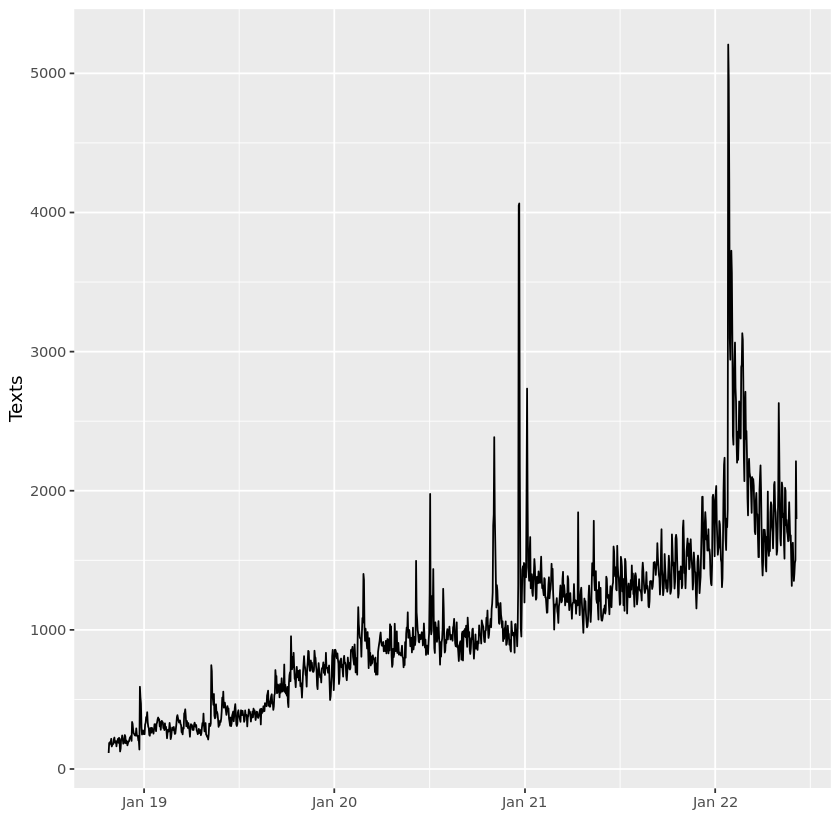

In [15]:
ggplot(df_plot, aes(x=df_chunks_cut, y=Freq, group = 1)) +
geom_line() + scale_x_date(date_labels = "%b %y") + xlab("") + ylab("Texts")
ggsave("../Plots/Full_daily_plot.pdf")

In [ ]:
df_max <- df_plot[order(df_plot$Freq),]
tail(df_max)

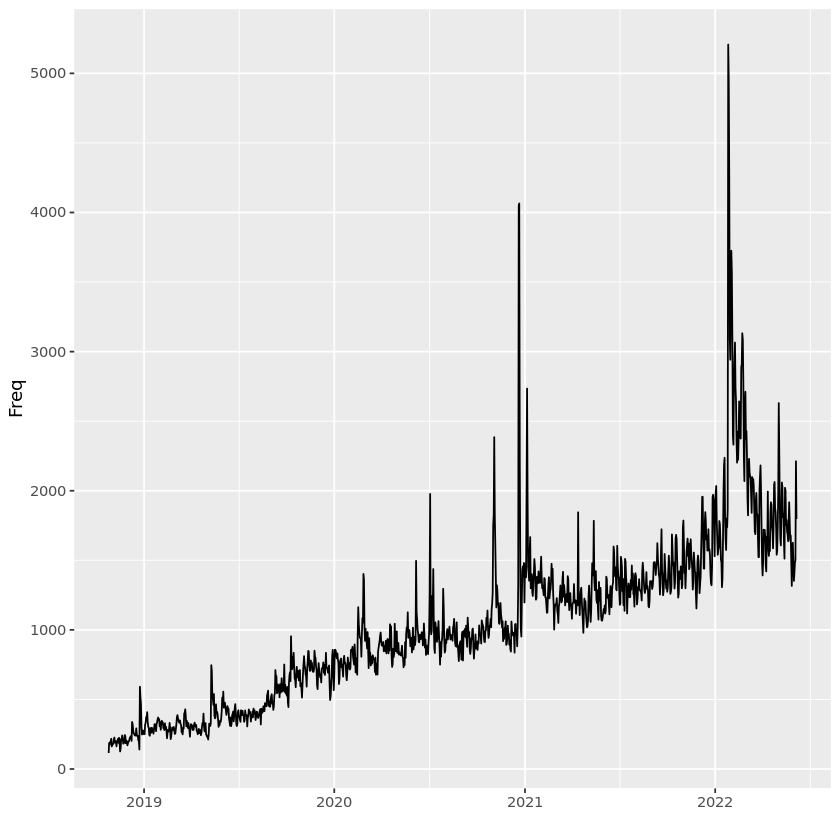

In [69]:
df_plot_2 <- tail(df_plot, n= 3000)
ggplot(df_plot_2, aes(x=df_chunks_cut, y=Freq, group = 1)) +
geom_line()+xlab("")

In [70]:
tail(df_plot_2[order(df_plot_2$Freq),], n=60)

df_chunks_cut Freq
1237 2022-03-14    2042
1278 2022-04-24    2043
1293 2022-05-09    2059
1279 2022-04-25    2063
1221 2022-02-26    2069
1238 2022-03-15    2084
1233 2022-03-10    2088
1236 2022-03-13    2098
1251 2022-03-28    2104
1232 2022-03-09    2106
1231 2022-03-08    2131
1229 2022-03-06    2168
1252 2022-03-29    2182
1182 2022-01-18    2188
790  2020-12-22    2195
1207 2022-02-12    2202
1320 2022-06-05    2212
1209 2022-02-14    2222
1230 2022-03-07    2229
1183 2022-01-19    2237
1220 2022-02-25    2244
1226 2022-03-03    2255
1288 2022-05-04    2268
1200 2022-02-05    2331
1206 2022-02-11    2359
1224 2022-03-01    2372
1210 2022-02-15    2374
1214 2022-02-19    2375
1213 2022-02-18    2382
741  2020-11-03    2385
1199 2022-02-04    2394
1208 2022-02-13    2424
1225 2022-03-02    2429
1212 2022-02-17    2529
1222 2022-02-27    2604
1287 2022-05-03    2630
1211 2022-02-16    2642
1205 2022-02-10    2643
1223 2022-02-28    2711
804  2021-01-05    2734
1204 2022-02-09    2740
1201 2022-02-06    2751
1219 2022-02-24    2786
1215 2022-02-20    2890
1216 2022-02-21    2906
1202 2022-02-07    2926
1194 2022-01-30    2942
1203 2022-02-08    3065
1198 2022-02-03    3077
1218 2022-02-23    3086
1193 2022-01-29    3100
1217 2022-02-22    3132
1195 2022-01-31    3369
1197 2022-02-02    3565
1196 2022-02-01    3725
788  2020-12-20    4051
789  2020-12-21    4065
1192 2022-01-28    4237
1191 2022-01-27    4957
1190 2022-01-26    5207

In [72]:
filepath <- "../Plots/Topic/"
for (topic in topics){
    df_temp <- df[df[paste("topic_",topic,sep="")]==1,]
    df_chunks_temp <- df_temp %>% mutate(starttime_daylight = as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")) %>% select(starttime_daylight)
    df_chunks_temp <- df_chunks_temp[order(df_chunks_temp$starttime_daylight),]
    df_chunks_cut_temp <- cut(df_chunks_temp, 'day')
    df_freq_temp <- table(df_chunks_cut_temp)
    df_plot_temp <- as.data.frame(df_freq_temp)
    df_plot_temp$df_chunks_cut_temp <- as.Date(df_plot_temp$df_chunks_cut_temp)

    ggplot(df_plot_temp, aes(x=df_chunks_cut_temp, y=Freq, group = 1)) +
    geom_line() + scale_x_date(date_labels = "%b %y") + xlab("") + ggtitle(topic)
    filename <- paste(topic,".pdf",sep="")
    ggsave(paste(filepath,filename, sep=""))
}

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



In [73]:
filepath <- "../Plots/Referral/"
for (referral in referrals){
    df_temp <- df[df[paste("referral_",referral,sep="")]==1,]
    df_chunks_temp <- df_temp %>% mutate(starttime_daylight = as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")) %>% select(starttime_daylight)
    df_chunks_temp <- df_chunks_temp[order(df_chunks_temp$starttime_daylight),]
    df_chunks_cut_temp <- cut(df_chunks_temp, 'day')
    df_freq_temp <- table(df_chunks_cut_temp)
    df_plot_temp <- as.data.frame(df_freq_temp)
    df_plot_temp$df_chunks_cut_temp <- as.Date(df_plot_temp$df_chunks_cut_temp)

    ggplot(df_plot_temp, aes(x=df_chunks_cut_temp, y=Freq, group = 1)) +
    geom_line() + scale_x_date(date_labels = "%b %y") + xlab("") + ggtitle(referral)
    filename <- paste(referral,".pdf",sep="")
    ggsave(paste(filepath,filename, sep=""))
}

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



In [74]:
filepath <- "../Plots/Media/"
for (source in media){
    df_temp <- df[df[paste("media_",source,sep="")]==1,]
    df_chunks_temp <- df_temp %>% mutate(starttime_daylight = as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")) %>% select(starttime_daylight)
    df_chunks_temp <- df_chunks_temp[order(df_chunks_temp$starttime),]
    df_chunks_cut_temp <- cut(df_chunks_temp, 'day')
    df_freq_temp <- table(df_chunks_cut_temp)
    df_plot_temp <- as.data.frame(df_freq_temp)
    df_plot_temp$df_chunks_cut_temp <- as.Date(df_plot_temp$df_chunks_cut_temp)

    ggplot(df_plot_temp, aes(x=df_chunks_cut_temp, y=Freq, group = 1)) +
    geom_line() + scale_x_date(date_labels = "%b %y") + xlab("") + ggtitle(source)
    filename <- paste(source,".pdf",sep="")
    ggsave(paste(filepath,filename, sep=""))
}

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



In [30]:
top_5_topics <- c("Suicide", "Depressed", "Anxiety/Stress", "Relationship", "Other")
df_top_5 <- df %>% mutate(starttime_daylight = as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")) %>% select(starttime_daylight)
df_top_5 <- df_top_5[order(df_top_5$starttime_daylight),]
df_top_5 <- cut(df_top_5, 'day')
df_top_5 <- table(df_top_5)
df_top_5 <- as.data.frame(df_top_5)
df_top_5 <- as.data.frame(df_top_5[,1])
colnames(df_top_5) <- "day"
head(df_top_5)

day       
1 2018-10-25
2 2018-10-26
3 2018-10-27
4 2018-10-28
5 2018-10-29
6 2018-10-30

In [31]:
for (topic in top_5_topics){
    df_temp <- df[df[paste("topic_",topic,sep="")]==1,]
    df_chunks_temp <- df_temp %>% mutate(starttime_daylight = as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")) %>% select(starttime_daylight)
    df_chunks_temp <- df_chunks_temp[order(df_chunks_temp$starttime_daylight),]
    df_chunks_cut_temp <- cut(df_chunks_temp, 'day')
    df_freq_temp <- table(df_chunks_cut_temp)
    df_plot_temp <- as.data.frame(df_freq_temp)
    colnames(df_plot_temp) <- c("day", paste(topic))
    df_top_5 <- merge(x=df_top_5, y=df_plot_temp, by="day")
}
head(df_top_5)

day        Suicide Depressed Anxiety/Stress Relationship Other
1 2018-10-25 31      22        31             23           16   
2 2018-10-26 60      42        40             38           29   
3 2018-10-27 58      52        54             39           20   
4 2018-10-28 51      69        43             58           27   
5 2018-10-29 55      70        58             38           19   
6 2018-10-30 53      62        48             44           30

In [32]:
df_top_5$day <- as.Date(df_top_5$day)
df_top_5_plot <- df_top_5 %>% filter(day >= "2021-01-01" & day < "2022-01-01")

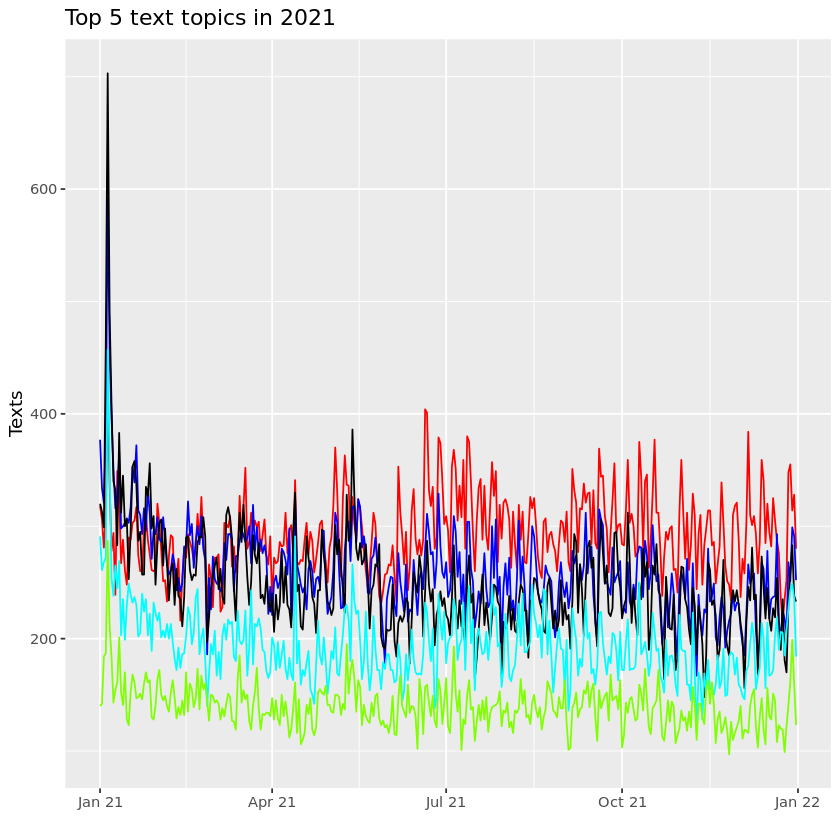

In [78]:
ggplot(df_top_5_plot, aes(x=day)) +
    geom_line(aes(y=Suicide), color = "red") + 
    geom_line(aes(y=Depressed), color = "blue") +
    geom_line(aes(y=df_top_5_plot[,4]), color = "black") +
    geom_line(aes(y=Relationship), color = "cyan") +
    geom_line(aes(y=Other), color = "chartreuse") +
    scale_x_date(date_labels = "%b %y") + ylab("Texts") + xlab("") + ggtitle("Top 5 text topics in 2021")

Warning message in melt(df_top_5_plot, id = "day"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df_top_5_plot). In the next version, this warning will become an error.”


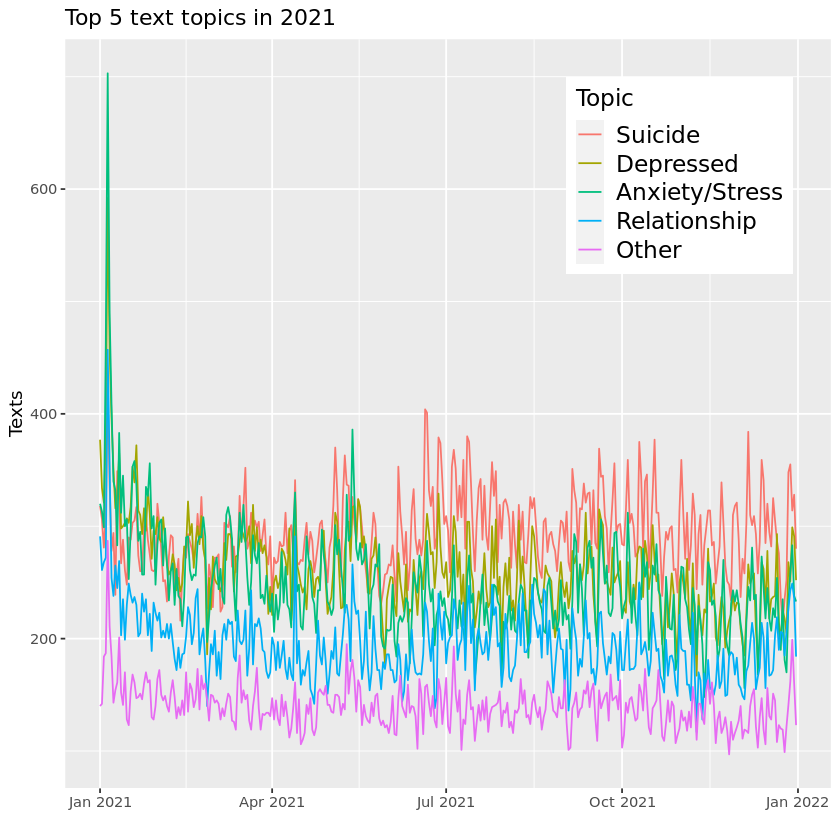

In [36]:
df_top_5_plot_new <- melt(df_top_5_plot, id="day")

ggplot(data=df_top_5_plot_new,
       aes(x=day, y=value, colour=variable)) +
       theme(
       legend.position = c(.95, .95),
       legend.justification = c("right", "top"),
       legend.box.just = "right",
       legend.margin = margin(6, 6, 6, 6),
            legend.title = element_text(size = 14),
           legend.text = element_text(size = 14)
       ) + labs(colour = "Topic") + xlab("") + ylab("Texts") + ggtitle("Top 5 text topics in 2021") +
       geom_line()
ggsave("../Plots/Top_5_topics.pdf", height = 10, width = 10)

In [80]:
df_top_5_hourly <- df %>% mutate(starttime_daylight = as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")) %>% select(starttime_daylight)
df_top_5_hourly <- df_top_5_hourly[order(df_top_5_hourly$starttime_daylight),]
df_top_5_hourly <- cut(df_top_5_hourly, 'hour')
df_top_5_hourly <- table(df_top_5_hourly)
df_top_5_hourly <- as.data.frame(df_top_5_hourly)
df_top_5_hourly <- as.data.frame(df_top_5_hourly[,1])
colnames(df_top_5_hourly) <- "hour"
head(df_top_5_hourly)

hour               
1 2018-10-25 15:00:00
2 2018-10-25 16:00:00
3 2018-10-25 17:00:00
4 2018-10-25 18:00:00
5 2018-10-25 19:00:00
6 2018-10-25 20:00:00

In [81]:
for (topic in top_5_topics){
    df_temp <- df[df[paste("topic_",topic,sep="")]==1,]
    df_chunks_temp <- df_temp %>% mutate(starttime_daylight = as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")) %>% select(starttime_daylight)
    df_chunks_temp <- df_chunks_temp[order(df_chunks_temp$starttime_daylight),]
    df_chunks_cut_temp <- cut(df_chunks_temp, 'hour')
    df_freq_temp <- table(df_chunks_cut_temp)
    df_plot_temp <- as.data.frame(df_freq_temp)
    colnames(df_plot_temp) <- c("hour", paste(topic))
    df_top_5_hourly <- merge(x=df_top_5_hourly, y=df_plot_temp, by="hour")
}
head(df_top_5_hourly)

hour                Suicide Depressed Anxiety/Stress Relationship Other
1 2018-10-25 17:00:00 4       1         1              0            1    
2 2018-10-25 18:00:00 2       1         1              1            2    
3 2018-10-25 19:00:00 5       3         5              2            0    
4 2018-10-25 20:00:00 5       4         4              7            3    
5 2018-10-25 21:00:00 4       3         3              3            5    
6 2018-10-25 22:00:00 6       3         8              3            2

In [82]:
df_top_5_hourly <- df_top_5_hourly %>% mutate(hour = as.POSIXct(hour, format="%Y-%m-%d %H:%M:%S",tz="GMT"))

In [83]:
df_top_5_hourly_plot <- df_top_5_hourly %>% filter(hour >= "2021-11-01 00:00:00" & hour < "2021-12-01 00:00:00")

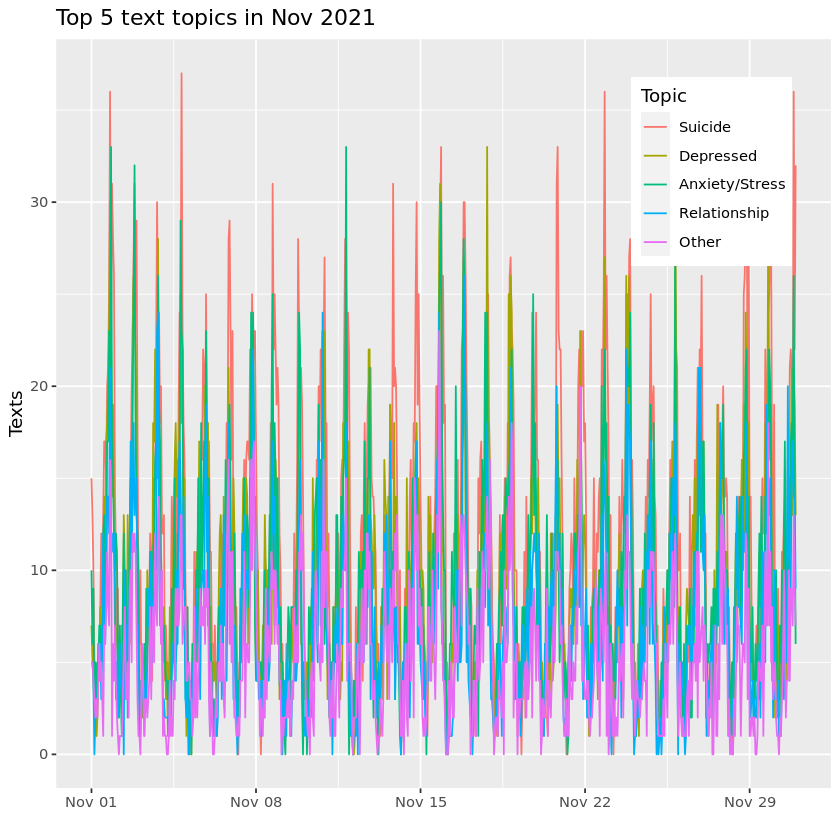

In [84]:
df_top_5_plot_hourly_new <- melt(df_top_5_hourly_plot, id="hour")

ggplot(data=df_top_5_plot_hourly_new,
       aes(x=hour, y=value, colour=variable)) +
       theme(
       legend.position = c(.95, .95),
       legend.justification = c("right", "top"),
       legend.box.just = "right",
       legend.margin = margin(6, 6, 6, 6)
       ) + labs(colour = "Topic") + xlab("") + ylab("Texts") + ggtitle("Top 5 text topics in Nov 2021") +
       geom_line()
ggsave("../Plots/Top_5_topics_hourly_Nov21.pdf", height = 10, width = 20)

In [16]:
library(data.table)
df_referrals <- df %>% mutate(starttime_daylight = as.POSIXct(as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")))
df_referrals <- df_referrals %>% select("referral_Other - Write In", "referral_Media or social media",
              "referral_Google search", "referral_From a medical or mental health professional",
              "referral_From a family member or friend", starttime_daylight) 
df_referrals <- df_referrals %>% mutate(time = paste(paste0("Q",quarter(starttime_daylight)),year(starttime_daylight))) %>% select(-starttime_daylight)

df_referrals <- aggregate( df_referrals[,1:5], list(df_referrals[,6]), FUN = sum )


Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [17]:
library(zoo)
df_referrals$Group.1 <- as.yearqtr(df_referrals$Group.1, "Q%q %Y")
df_referrals <- df_referrals[order(df_referrals[1]),]
df_referrals


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


Group.1 referral_Other - Write In referral_Media or social media
12 2018 Q4  194                        956                         
1  2019 Q1  320                       1796                         
5  2019 Q2  527                       3191                         
9  2019 Q3  650                       3726                         
13 2019 Q4 1474                       8523                         
2  2020 Q1 2374                      11424                         
6  2020 Q2 3093                      12386                         
10 2020 Q3 3092                      13248                         
14 2020 Q4 3445                      14841                         
3  2021 Q1 3737                      15559                         
7  2021 Q2 3654                      13530                         
11 2021 Q3 4062                      12099                         
15 2021 Q4 4018                      12310                         
4  2022 Q1 5461                      20390                         
8  2022 Q2 2145                       7325                         
   referral_Google search referral_From a medical or mental health professional
12  1144                   323                                                 
1   1976                   616                                                 
5   2083                   953                                                 
9   2697                  1148                                                 
13  5791                  2158                                                 
2   7353                  3307                                                 
6   8259                  4190                                                 
10  8634                  4042                                                 
14  9781                  4685                                                 
3  12015                  5696                                                 
7  11683                  5789                                                 
11 12479                  5923                                                 
15 13358                  6126                                                 
4  13541                  6838                                                 
8   5584                  2992                                                 
   referral_From a family member or friend
12  498                                   
1   890                                   
5  1516                                   
9  1519                                   
13 2942                                   
2  3830                                   
6  5027                                   
10 5213                                   
14 6126                                   
3  6816                                   
7  6706                                   
11 6665                                   
15 6842                                   
4  9713                                   
8  3889

In [18]:
df_referrals <- melt(df_referrals, id.vars = 'Group.1', variable.name = 'Referrals')

Warning message in melt(df_referrals, id.vars = "Group.1", variable.name = "Referrals"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df_referrals). In the next version, this warning will become an error.”


In [19]:
df_referrals$Referrals <- sub('referral_', '', df_referrals$Referrals)
df_referrals

Group.1 Referrals                                    value
1  2018 Q4 Other - Write In                               194
2  2019 Q1 Other - Write In                               320
3  2019 Q2 Other - Write In                               527
4  2019 Q3 Other - Write In                               650
5  2019 Q4 Other - Write In                              1474
6  2020 Q1 Other - Write In                              2374
7  2020 Q2 Other - Write In                              3093
8  2020 Q3 Other - Write In                              3092
9  2020 Q4 Other - Write In                              3445
10 2021 Q1 Other - Write In                              3737
11 2021 Q2 Other - Write In                              3654
12 2021 Q3 Other - Write In                              4062
13 2021 Q4 Other - Write In                              4018
14 2022 Q1 Other - Write In                              5461
15 2022 Q2 Other - Write In                              2145
16 2018 Q4 Media or social media                          956
17 2019 Q1 Media or social media                         1796
18 2019 Q2 Media or social media                         3191
19 2019 Q3 Media or social media                         3726
20 2019 Q4 Media or social media                         8523
21 2020 Q1 Media or social media                        11424
22 2020 Q2 Media or social media                        12386
23 2020 Q3 Media or social media                        13248
24 2020 Q4 Media or social media                        14841
25 2021 Q1 Media or social media                        15559
26 2021 Q2 Media or social media                        13530
27 2021 Q3 Media or social media                        12099
28 2021 Q4 Media or social media                        12310
29 2022 Q1 Media or social media                        20390
30 2022 Q2 Media or social media                         7325
⋮  ⋮       ⋮                                            ⋮    
46 2018 Q4 From a medical or mental health professional  323 
47 2019 Q1 From a medical or mental health professional  616 
48 2019 Q2 From a medical or mental health professional  953 
49 2019 Q3 From a medical or mental health professional 1148 
50 2019 Q4 From a medical or mental health professional 2158 
51 2020 Q1 From a medical or mental health professional 3307 
52 2020 Q2 From a medical or mental health professional 4190 
53 2020 Q3 From a medical or mental health professional 4042 
54 2020 Q4 From a medical or mental health professional 4685 
55 2021 Q1 From a medical or mental health professional 5696 
56 2021 Q2 From a medical or mental health professional 5789 
57 2021 Q3 From a medical or mental health professional 5923 
58 2021 Q4 From a medical or mental health professional 6126 
59 2022 Q1 From a medical or mental health professional 6838 
60 2022 Q2 From a medical or mental health professional 2992 
61 2018 Q4 From a family member or friend                498 
62 2019 Q1 From a family member or friend                890 
63 2019 Q2 From a family member or friend               1516 
64 2019 Q3 From a family member or friend               1519 
65 2019 Q4 From a family member or friend               2942 
66 2020 Q1 From a family member or friend               3830 
67 2020 Q2 From a family member or friend               5027 
68 2020 Q3 From a family member or friend               5213 
69 2020 Q4 From a family member or friend               6126 
70 2021 Q1 From a family member or friend               6816 
71 2021 Q2 From a family member or friend               6706 
72 2021 Q3 From a family member or friend               6665 
73 2021 Q4 From a family member or friend               6842 
74 2022 Q1 From a family member or friend               9713 
75 2022 Q2 From a family member or friend               3889

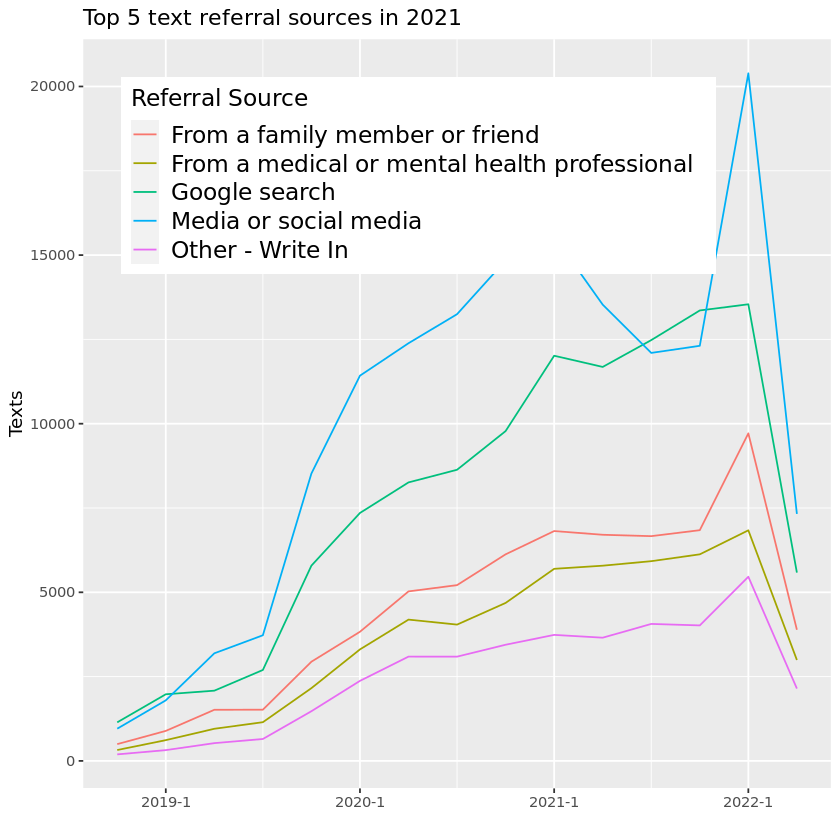

In [34]:
ggplot(data=df_referrals,
       aes(x=Group.1, y=value, colour=Referrals)) +
       theme(
       legend.position = c(.05, .95),
       legend.justification = c("left", "top"),
       legend.box.just = "right",
       legend.margin = margin(6, 6, 6, 6), 
            legend.title = element_text(size = 14),
           legend.text = element_text(size = 14)
       ) + labs(colour = "Referral Source") + xlab("") + ylab("Texts") + ggtitle("Top 5 text referral sources in 2021") +
       geom_line()
ggsave("../Plots/Referrals_over_time_quarterly.pdf", height = 10, width = 10)

In [21]:
df_referrals

Group.1 Referrals                                    value
1  2018 Q4 Other - Write In                               194
2  2019 Q1 Other - Write In                               320
3  2019 Q2 Other - Write In                               527
4  2019 Q3 Other - Write In                               650
5  2019 Q4 Other - Write In                              1474
6  2020 Q1 Other - Write In                              2374
7  2020 Q2 Other - Write In                              3093
8  2020 Q3 Other - Write In                              3092
9  2020 Q4 Other - Write In                              3445
10 2021 Q1 Other - Write In                              3737
11 2021 Q2 Other - Write In                              3654
12 2021 Q3 Other - Write In                              4062
13 2021 Q4 Other - Write In                              4018
14 2022 Q1 Other - Write In                              5461
15 2022 Q2 Other - Write In                              2145
16 2018 Q4 Media or social media                          956
17 2019 Q1 Media or social media                         1796
18 2019 Q2 Media or social media                         3191
19 2019 Q3 Media or social media                         3726
20 2019 Q4 Media or social media                         8523
21 2020 Q1 Media or social media                        11424
22 2020 Q2 Media or social media                        12386
23 2020 Q3 Media or social media                        13248
24 2020 Q4 Media or social media                        14841
25 2021 Q1 Media or social media                        15559
26 2021 Q2 Media or social media                        13530
27 2021 Q3 Media or social media                        12099
28 2021 Q4 Media or social media                        12310
29 2022 Q1 Media or social media                        20390
30 2022 Q2 Media or social media                         7325
⋮  ⋮       ⋮                                            ⋮    
46 2018 Q4 From a medical or mental health professional  323 
47 2019 Q1 From a medical or mental health professional  616 
48 2019 Q2 From a medical or mental health professional  953 
49 2019 Q3 From a medical or mental health professional 1148 
50 2019 Q4 From a medical or mental health professional 2158 
51 2020 Q1 From a medical or mental health professional 3307 
52 2020 Q2 From a medical or mental health professional 4190 
53 2020 Q3 From a medical or mental health professional 4042 
54 2020 Q4 From a medical or mental health professional 4685 
55 2021 Q1 From a medical or mental health professional 5696 
56 2021 Q2 From a medical or mental health professional 5789 
57 2021 Q3 From a medical or mental health professional 5923 
58 2021 Q4 From a medical or mental health professional 6126 
59 2022 Q1 From a medical or mental health professional 6838 
60 2022 Q2 From a medical or mental health professional 2992 
61 2018 Q4 From a family member or friend                498 
62 2019 Q1 From a family member or friend                890 
63 2019 Q2 From a family member or friend               1516 
64 2019 Q3 From a family member or friend               1519 
65 2019 Q4 From a family member or friend               2942 
66 2020 Q1 From a family member or friend               3830 
67 2020 Q2 From a family member or friend               5027 
68 2020 Q3 From a family member or friend               5213 
69 2020 Q4 From a family member or friend               6126 
70 2021 Q1 From a family member or friend               6816 
71 2021 Q2 From a family member or friend               6706 
72 2021 Q3 From a family member or friend               6665 
73 2021 Q4 From a family member or friend               6842 
74 2022 Q1 From a family member or friend               9713 
75 2022 Q2 From a family member or friend               3889

In [22]:
sort(colSums(df_referrals[,-9:-11]))

ERROR: Error in colSums(df_referrals[, -9:-11]): 'x' must be numeric


In [23]:
df_media <- df %>% select("media_Other", "media_TikTok", "media_Facebook", "media_Instagram", "media_News article",starttime_daylight) %>% mutate(starttime_daylight = as.POSIXct(as.POSIXct(starttime_daylight, format="%Y-%m-%d %H:%M:%S",tz="GMT")))
df_media <- df_media %>% mutate(time = paste(paste0("Q",quarter(starttime_daylight)),year(starttime_daylight))) %>% select(-starttime_daylight)

In [24]:
df_media <- aggregate( df_media[,1:5], list(df_media[,6]), FUN = sum )

In [25]:
sort(colSums(df_media[,-10]))

ERROR: Error in colSums(df_media[, -10]): 'x' must be numeric


In [26]:
df_media$Group.1 <- as.yearqtr(df_media$Group.1, "Q%q %Y")
df_media <- df_media[order(df_media[1]),]
df_media

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


Group.1 media_Other media_TikTok media_Facebook media_Instagram
12 2018 Q4  141          10          251            321           
1  2019 Q1  288           7          647            461           
5  2019 Q2  541           9          954            803           
9  2019 Q3  468          22         1459           1059           
13 2019 Q4  984          29         3757           2756           
2  2020 Q1 1245          38         5077           3307           
6  2020 Q2 1819          28         4787           3280           
10 2020 Q3 2039        1630         3931           3002           
14 2020 Q4 1995         970         4094           4936           
3  2021 Q1 2097        1145         4295           4874           
7  2021 Q2 2151        2157         3263           3409           
11 2021 Q3 1960        1580         2928           3176           
15 2021 Q4 2103        2175         2885           2889           
4  2022 Q1 2198        9752         2847           3129           
8  2022 Q2  952        2225         1493           1501           
   media_News article
12   63              
1    93              
5   435              
9   304              
13  514              
2   639              
6  1031              
10  823              
14  687              
3   743              
7   653              
11  563              
15  565              
4   619              
8   310

In [27]:
df_media <- melt(df_media, id.vars = 'Group.1', variable.name = 'Media')
df_media$Media <- sub('media_', '', df_media$Media)
df_media

Warning message in melt(df_media, id.vars = "Group.1", variable.name = "Media"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(df_media). In the next version, this warning will become an error.”


Group.1 Media        value
1  2018 Q4 Other         141 
2  2019 Q1 Other         288 
3  2019 Q2 Other         541 
4  2019 Q3 Other         468 
5  2019 Q4 Other         984 
6  2020 Q1 Other        1245 
7  2020 Q2 Other        1819 
8  2020 Q3 Other        2039 
9  2020 Q4 Other        1995 
10 2021 Q1 Other        2097 
11 2021 Q2 Other        2151 
12 2021 Q3 Other        1960 
13 2021 Q4 Other        2103 
14 2022 Q1 Other        2198 
15 2022 Q2 Other         952 
16 2018 Q4 TikTok         10 
17 2019 Q1 TikTok          7 
18 2019 Q2 TikTok          9 
19 2019 Q3 TikTok         22 
20 2019 Q4 TikTok         29 
21 2020 Q1 TikTok         38 
22 2020 Q2 TikTok         28 
23 2020 Q3 TikTok       1630 
24 2020 Q4 TikTok        970 
25 2021 Q1 TikTok       1145 
26 2021 Q2 TikTok       2157 
27 2021 Q3 TikTok       1580 
28 2021 Q4 TikTok       2175 
29 2022 Q1 TikTok       9752 
30 2022 Q2 TikTok       2225 
⋮  ⋮       ⋮            ⋮    
46 2018 Q4 Instagram     321 
47 2019 Q1 Instagram     461 
48 2019 Q2 Instagram     803 
49 2019 Q3 Instagram    1059 
50 2019 Q4 Instagram    2756 
51 2020 Q1 Instagram    3307 
52 2020 Q2 Instagram    3280 
53 2020 Q3 Instagram    3002 
54 2020 Q4 Instagram    4936 
55 2021 Q1 Instagram    4874 
56 2021 Q2 Instagram    3409 
57 2021 Q3 Instagram    3176 
58 2021 Q4 Instagram    2889 
59 2022 Q1 Instagram    3129 
60 2022 Q2 Instagram    1501 
61 2018 Q4 News article   63 
62 2019 Q1 News article   93 
63 2019 Q2 News article  435 
64 2019 Q3 News article  304 
65 2019 Q4 News article  514 
66 2020 Q1 News article  639 
67 2020 Q2 News article 1031 
68 2020 Q3 News article  823 
69 2020 Q4 News article  687 
70 2021 Q1 News article  743 
71 2021 Q2 News article  653 
72 2021 Q3 News article  563 
73 2021 Q4 News article  565 
74 2022 Q1 News article  619 
75 2022 Q2 News article  310

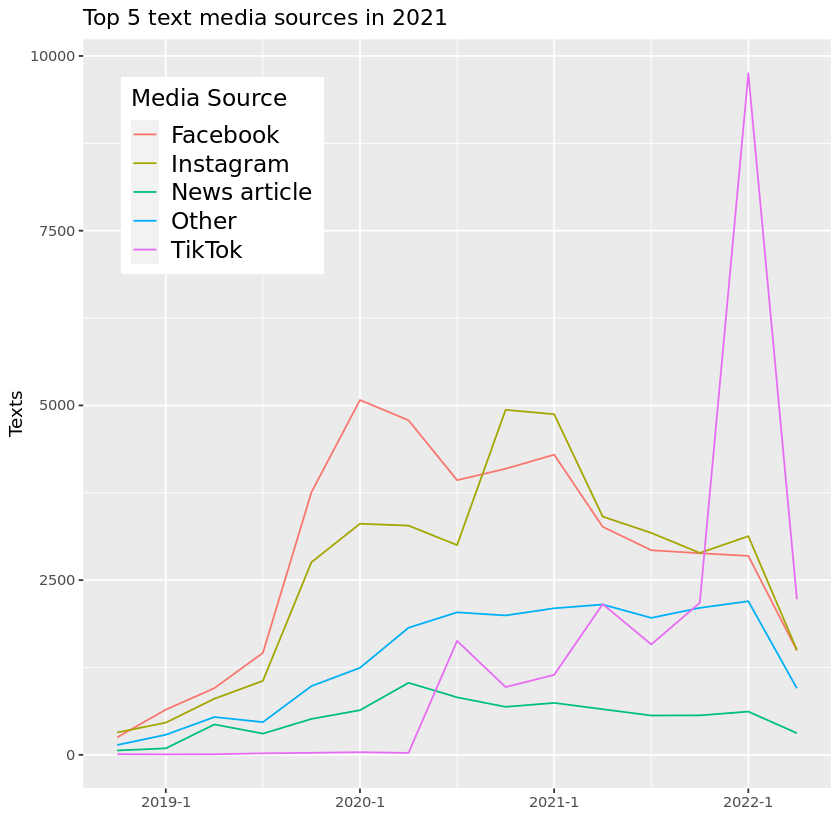

In [35]:
ggplot(data=df_media,
       aes(x=Group.1, y=value, colour=Media)) +
       theme(
       legend.position = c(.05, .95),
       legend.justification = c("left", "top"),
       legend.box.just = "right",
       legend.margin = margin(6, 6, 6, 6),
            legend.title = element_text(size = 14),
           legend.text = element_text(size = 14)
       ) + labs(colour = "Media Source") + xlab("") + ylab("Texts") + ggtitle("Top 5 text media sources in 2021") +
       geom_line()
ggsave("../Plots/Media_over_time_quarterly.pdf", height = 10, width = 10)